# Name: Omkar Thorve
# PRN: 24070149016

# Experiment No. 2(A)

## Title: Implementation of Hough Transform for Line Detection from Scratch and circle detection using library function


### Theory:
####Q.1. What is Hough transform? What is the need for Hough transform?
Ans. The Hough transform is a computer vision and image processing technique used for detecting and extracting geometrical shapes, such as lines, circles, and ellipses, from digital images. It was proposed by Paul Hough in 1962 as a method for automatically detecting patterns in images.
The need for the Hough transform arises from the limitations of traditional image processing techniques for detecting geometrical shapes. Traditional methods often rely on pixel intensity values or gradients, which can be sensitive to noise, varying lighting conditions, and occlusions. The Hough transform, on the other hand, is based on a different approach that is robust to these issues.
The Hough transform works by transforming the image data from the spatial domain to a parameter space, where patterns are represented as points or curves. This transformation allows for the detection of patterns even when they are not clearly defined in the spatial domain. For example, it can detect lines even if they are broken or have gaps, and it can detect circles or ellipses even if they are partially obscured.
The Hough transform is widely used in various computer vision and image processing applications, such as object detection, image segmentation, lane detection in autonomous vehicles, and medical image analysis. It is a powerful tool for detecting and extracting geometrical shapes from images, and it has found widespread use in many practical applications where traditional techniques may not be sufficient.


####Q.2.  Write an algorithm for line detection using Hough transform.
Ans. Input:
Image I with edges detected (e.g., using an edge detection algorithm like Canny)
Threshold T for line detection
Parameters for the Hough transform, such as the resolution of the parameter space (rho and theta increments)
  Output:
List of detected lines (represented as rho and theta values)
Algorithm:
Initialize an accumulator array H with zeros, representing the parameter space for the Hough transform. The size of the accumulator array will depend on the resolution of the parameter space (rho and theta increments) and the range of possible parameter values.
Loop through the edge points in image I. For each edge point, compute its corresponding rho and theta values using the Hough transform equations:
rho = x * cos(theta) + y * sin(theta)
where x and y are the coordinates of the edge point, and theta is the angle parameter in the parameter space.
Increment the corresponding bin in the accumulator array H for each computed rho and theta value.
After processing all edge points, loop through the accumulator array H and identify the bins with values greater than or equal to the threshold T. These bins represent the possible lines in the image.
Extract the detected lines from the identified bins by converting the rho and theta values back to Cartesian coordinates. For each detected line, store its rho and theta values in the list of detected lines.
Return the list of detected lines.


####Q.3. List applications of Hough transform and explain any one in detail.
The Hough transform is a computer vision algorithm that is commonly used to detect simple geometric shapes, such as lines, circles, and ellipses, in an image. Some applications of the Hough transform include Line Detection, Circle detection, Ellipse detection, and Object recognition.
The Hough transform is often used in object recognition as part of a larger computer vision system. Here are some ways the Hough transform can be applied in object recognition:
Shape detection: The Hough transform can be used to detect simple geometric shapes, such as circles, ellipses, and lines, in an image. This information can be used to identify and locate objects in the image that have a specific shape or geometry.
Feature extraction: The Hough transform can be used to extract features from an image, such as the position and orientation of lines or edges. These features can be used as part of a larger object recognition system to identify and classify objects.
Object segmentation: The Hough transform can be used to segment an image into regions that contain objects with a particular shape or geometry. For example, the Hough transform can be used to identify the locations of wheels on a car or the positions of people in a crowd.
Tracking: The Hough transform can be used to track the movement of objects over time. By detecting and tracking the shapes of objects in an image, the Hough transform can be used to monitor their movements and predict their future positions.


###Code

####Hough Transform Line Detection:

rho = 0, theta = -90


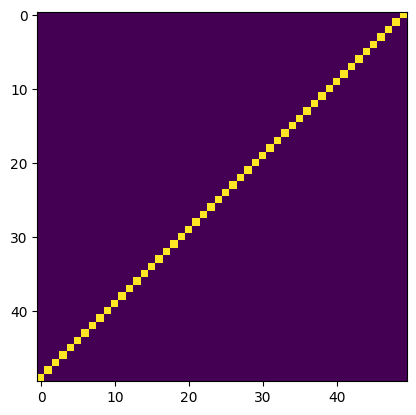

In [12]:
import numpy as np
import matplotlib.pyplot


def houghLine(image):
  Ny=image.shape[0]
  Nx=image.shape[1]
  accumulator=[]
  Maxdist=int(np.round(np.sqrt(Nx**2+ Ny**2)))
  thetas=np.deg2rad(np.arange(-90,90))
  rs=np.linspace(-Maxdist,Maxdist,2*Maxdist)
  accumulator=np.zeros((2*Maxdist,len(thetas)))
  for y in range(Ny):
    for x in range(Nx):
      if image[y,x]>0:
        for k in range(len(thetas)):
          r=x*np.cos(thetas[k])+y*np.sin(thetas[k])
          accumulator[int(r)+Maxdist,k]+=1
    return accumulator,thetas,rs


img1 = np.eye(50)
img2 = img1[::-1]
plt.imshow(img2)


a, t, r = houghLine(img2)
idx = np.argmax(a)
rho = int(r[int(idx/a.shape[1])])
theta = t[int(idx % a.shape[1])]
print("rho = {0:.0f}, theta = {1:.0f}".format(rho, np.rad2deg(theta)))


####Hough Transform Circle Detection:


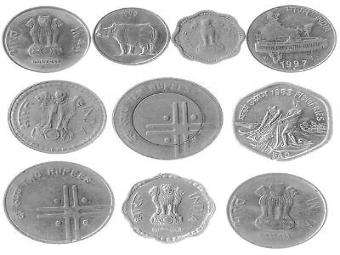

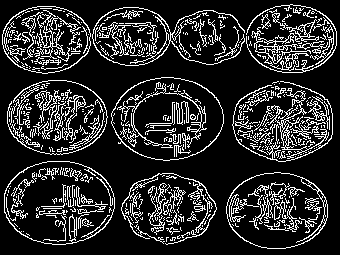

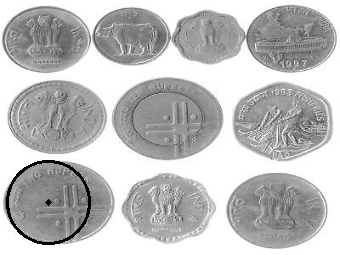

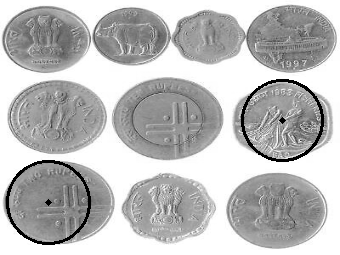

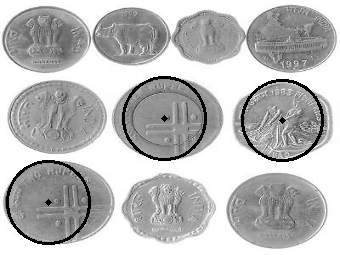

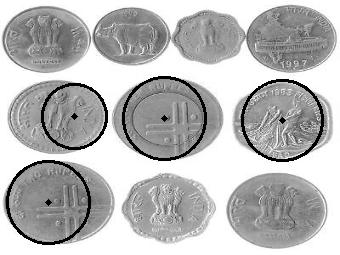

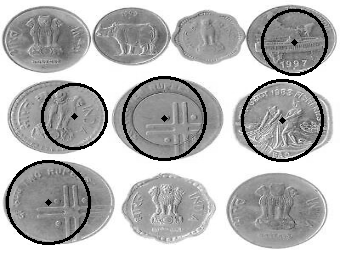

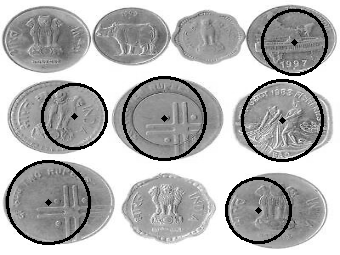

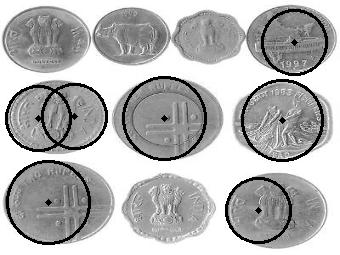

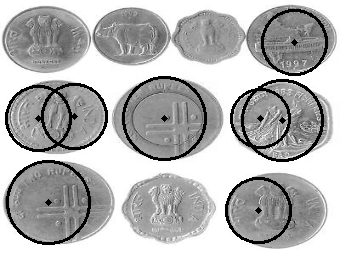

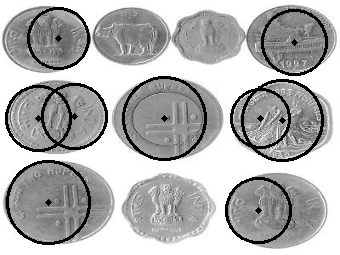

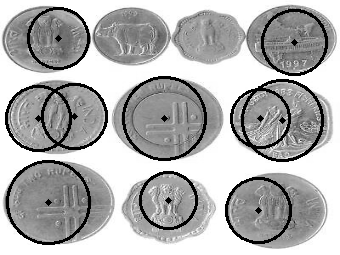

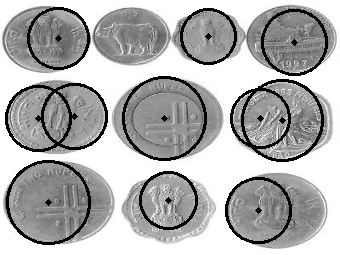

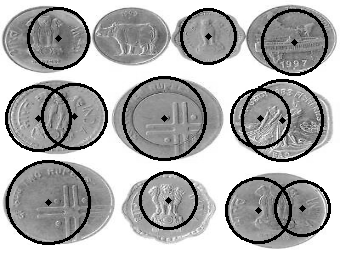

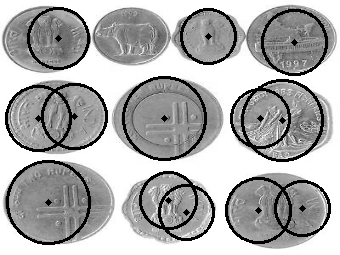

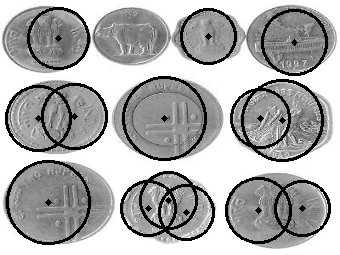

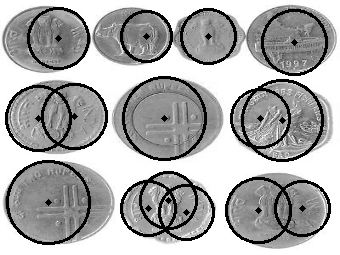

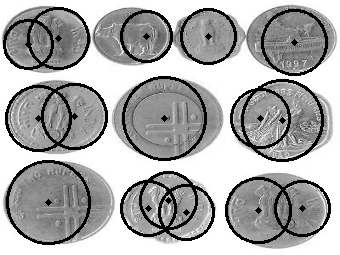

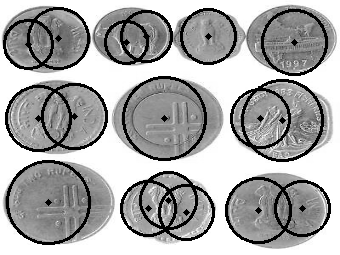

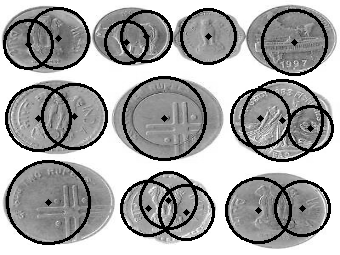

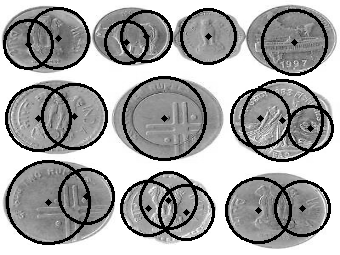

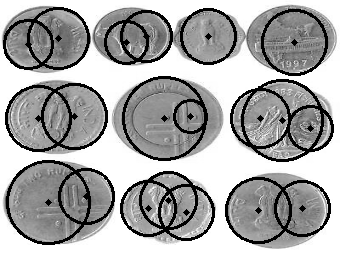

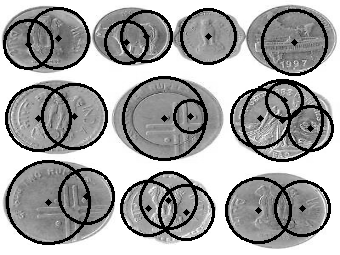

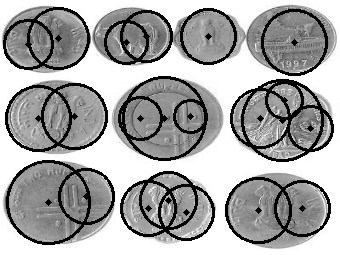

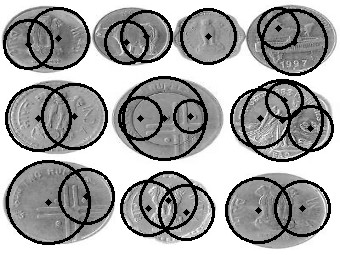

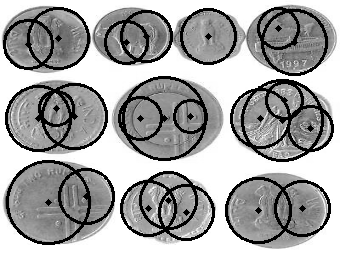

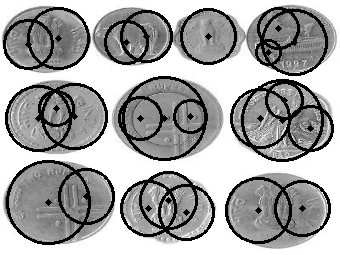

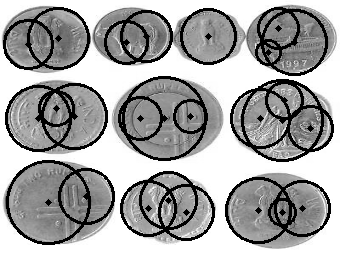

In [14]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow

# img = cv.imread('/content/drive/MyDrive/Colab Notebooks/coin.jpg', cv.IMREAD_GRAYSCALE)
img = cv2.imread('/content/s-l400.jpg', cv2.IMREAD_COLOR)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray=cv2.resize(gray,(340,255))
edges = cv2.Canny(gray,50,150)

# # gray_blurred = cv2.blur(gray, (3, 3))
# edge_blurred = cv2.blur(edges, (3, 3))

cv2_imshow(gray)
# # cv2_imshow(gray_blurred)
# cv2_imshow(img)
cv2_imshow(edges)
# # cv2_imshow(edge_blurred)

detected_circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT, 1, 20, param1 = 50,param2 = 30, minRadius = 3, maxRadius =45 )

if detected_circles is not None:
  detected_circles = np.uint16(np.around(detected_circles))
  for pt in detected_circles[0, :]:
    a, b, r = pt[0], pt[1], pt[2]
    cv2.circle(gray, (a, b), r, (0, 255, 0), 2)

        # Draw a small circle (of radius 1) to show the center.
    cv2.circle(gray, (a, b), 1, (0, 0, 255), 3)
    cv2_imshow(gray)
    cv2.waitKey(0)


#### Example using function.


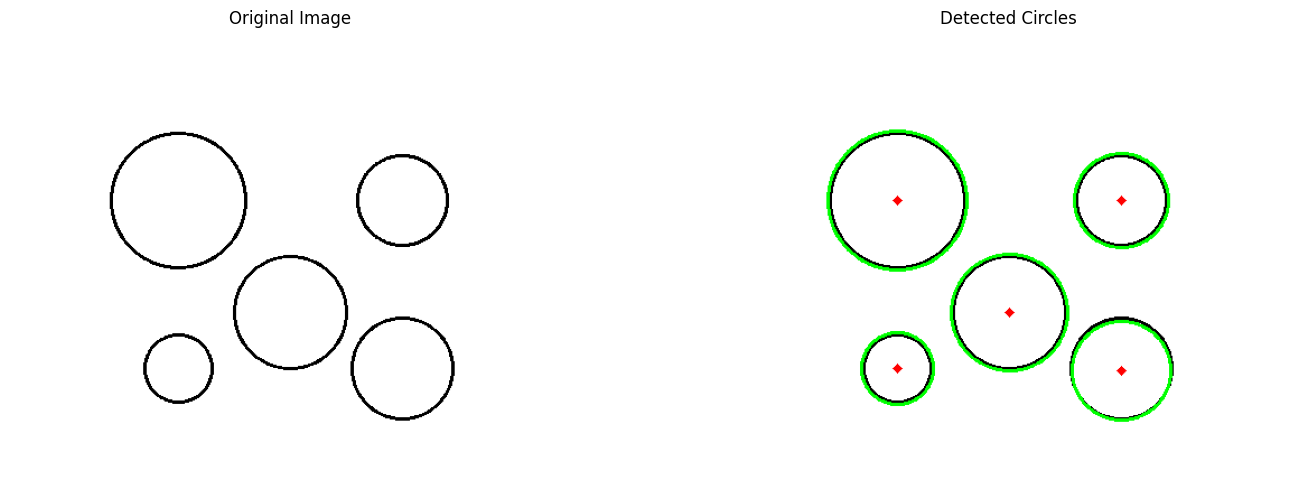


Detected circles (x, y, radius):
Circle at (150, 150) with radius 62
Circle at (250, 250) with radius 52
Circle at (350, 150) with radius 42
Circle at (150, 300) with radius 32
Circle at (350, 302) with radius 44


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def detect_circles(image, min_radius=20, max_radius=100, min_dist=20):
    """
    Detect circles in an image using Hough Transform.

    Parameters:
    image: grayscale input image
    min_radius: minimum circle radius to detect
    max_radius: maximum circle radius to detect
    min_dist: minimum distance between circle centers

    Returns:
    circles: detected circles as (x, y, radius)
    """

    blurred = cv2.GaussianBlur(image, (9, 9), 2) # Bluring of the image to reduce noise

    # Applying Hough Circle Transform
    circles = cv2.HoughCircles(
        blurred,
        cv2.HOUGH_GRADIENT,
        dp=1,              # Inverse ratio of accumulator resolution
        minDist=min_dist,  # Minimum distance between centers
        param1=50,         # Upper threshold for edge detection
        param2=30,         # Threshold for center detection
        minRadius=min_radius,
        maxRadius=max_radius
    )

    if circles is not None:
        # Convert coordinates and radius to integers
        circles = np.round(circles[0, :]).astype(int)

        # Draw detected circles
        result = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
        for x, y, r in circles:
            #  the circle
            cv2.circle(result, (x, y), r, (0, 255, 0), 2)
            # the center point
            cv2.circle(result, (x, y), 2, (0, 0, 255), 3)

        return circles, result

    return None, None

# Creates a test image with circles
def create_test_image(width=500, height=400):
    # Creates blank image
    image = np.zeros((height, width), dtype=np.uint8)
    image.fill(255)  # Fill with white

    # Draws some circles with different sizes
    circles = [
        (150, 150, 60),  # (x, y, radius)
        (350, 150, 40),
        (250, 250, 50),
        (150, 300, 30),
        (350, 300, 45)
    ]

    # Draws circles in black
    for x, y, r in circles:
        cv2.circle(image, (x, y), r, 0, 2)

    return image, circles


def main():
    # Creating test image
    test_image, ground_truth = create_test_image()

    # Detecting circles
    detected_circles, result = detect_circles(
        test_image,
        min_radius=20,
        max_radius=70,
        min_dist=30
    )

    # Plotting
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(121)
    plt.imshow(test_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Result with detected circles
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title('Detected Circles')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


    if detected_circles is not None:
        print("\nDetected circles (x, y, radius):")
        for circle in detected_circles:
            print(f"Circle at ({circle[0]}, {circle[1]}) with radius {circle[2]}")

if __name__ == "__main__":
    main()

####Result discussion:
Hough approach is effective for computing a global description of a feature(s). Traditional HT was concerned with detecting lines in an image, but it was subsequently expanded to identifying locations of arbitrary shapes, most often circles or ellipses.


####References:
[1] https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html

[2] https://www.analyticsvidhya.com/blog/2022/06/a-complete-guide-on-hough-transform/